# Explore National Dataset

This notebook is used to explore the `rivm-covid-19-national.csv` dataset. It contains various graph that visualize the data in the dataset.

In [1]:
import pandas as pd

## Load dataset

In [2]:
df = pd.read_csv("../data/processed/rivm-covid-19-national.csv")

In [3]:
df["PositiefGetest"] = df["PositiefGetest"].astype(int)
df["Opgenomen"] = df["Opgenomen"].astype(int)
df["Overleden"] = df["Overleden"].astype(int)
df["Datum"] = pd.to_datetime(df["Datum"])

In [4]:
df["PositiefGetestCumulatief"] = df["PositiefGetest"].cumsum(axis=0)
df["OpgenomenCumulatief"] = df["Opgenomen"].cumsum(axis=0)
df["OverledenCumulatief"] = df["Overleden"].cumsum(axis=0)

## Inspect dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   PositiefGetest            732 non-null    int64         
 1   Opgenomen                 732 non-null    int64         
 2   Overleden                 732 non-null    int64         
 3   Datum                     732 non-null    datetime64[ns]
 4   PositiefGetestCumulatief  732 non-null    int64         
 5   OpgenomenCumulatief       732 non-null    int64         
 6   OverledenCumulatief       732 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 40.2 KB


In [6]:
df.head()

,PositiefGetest,Opgenomen,Overleden,Datum,PositiefGetestCumulatief,OpgenomenCumulatief,OverledenCumulatief
0,0,1,0,2020-02-27,0,1,0
1,1,0,0,2020-02-28,1,1,0
2,1,1,0,2020-02-29,2,2,0
3,3,0,0,2020-03-01,5,2,0
4,5,0,0,2020-03-02,10,2,0


In [7]:
df.tail()

,PositiefGetest,Opgenomen,Overleden,Datum,PositiefGetestCumulatief,OpgenomenCumulatief,OverledenCumulatief
727,41065,31,11,2022-02-23,6132281,39342,21527
728,40705,32,13,2022-02-24,6172986,39374,21540
729,37211,26,8,2022-02-25,6210197,39400,21548
730,32669,17,6,2022-02-26,6242866,39417,21554
731,27180,12,3,2022-02-27,6270046,39429,21557


## Visualize cases per day

<AxesSubplot:xlabel='Datum'>

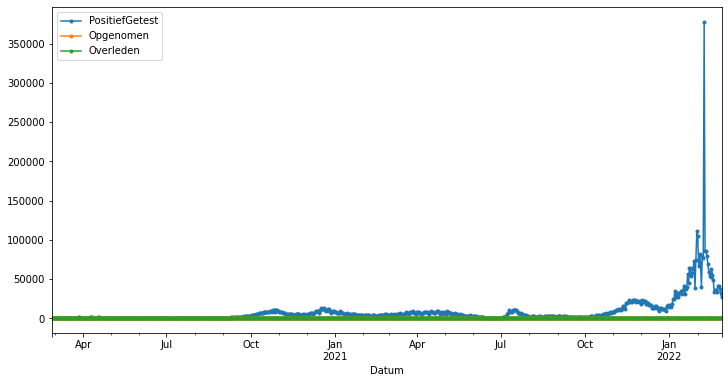

In [8]:
df.plot(
    x="Datum",
    y=["PositiefGetest", "Opgenomen", "Overleden"],
    figsize=(12,6),
    style=".-",
)

## Visualize cumulative per day

<AxesSubplot:xlabel='Datum'>

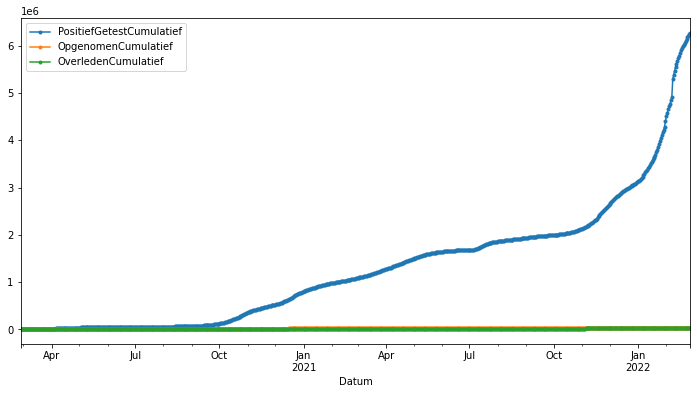

In [9]:
df.plot(
    x="Datum",
    y=["PositiefGetestCumulatief", "OpgenomenCumulatief", "OverledenCumulatief"],
    figsize=(12,6),
    style=".-",
)